In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv('/content/data.csv')
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,1489424,"Welcoming, easygoing, comfy bed, entire level",5294164,Efrat,NaN,FOURTEENTH WARD,42.667190,-73.815800,Private room,50.0,1,248,2024-02-27,1.94,1,233,50,NaN
1,2992450,Luxury 2 bedroom apartment,4621559,Kenneth,NaN,THIRD WARD,42.657890,-73.753700,Entire home/apt,70.0,28,9,2022-08-17,0.08,1,21,0,NaN
2,3820211,Restored Precinct in Center Sq. w/Parking,19648678,Terra,NaN,SIXTH WARD,42.652220,-73.767240,Entire home/apt,125.0,2,292,2024-02-18,2.51,4,360,8,NaN
3,5651579,Large studio apt by Capital Center & ESP@,29288920,Gregg,NaN,SECOND WARD,42.646150,-73.759660,Entire home/apt,105.0,7,337,2024-03-07,3.13,2,79,31,NaN
4,6623339,Center Sq. Loft in Converted Precinct w/ Parking,19648678,Terra,NaN,SIXTH WARD,42.652220,-73.767240,Entire home/apt,126.0,2,306,2023-12-26,2.87,4,0,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,1091422934956081673,2 bed with parking off Madison,232967878,Diana,NaN,TENTH WARD,42.659882,-73.784858,Entire home/apt,105.0,2,0,NaN,NaN,22,87,0,NaN
400,1091500387329731524,Triplex oasis w:parking near MVP,232967878,Diana,NaN,SECOND WARD,42.643241,-73.758052,Entire home/apt,83.0,2,0,NaN,NaN,22,79,0,NaN
401,1097995825442731795,New Center square studio,232967878,Diana,NaN,SIXTH WARD,42.652689,-73.765674,Entire home/apt,93.0,2,0,NaN,NaN,22,75,0,NaN
402,1100876731732967826,"Homey, Quiet 2BR W/ Washer Dryer",152762198,Allen,NaN,FOURTEENTH WARD,42.670080,-73.806911,Entire home/apt,100.0,3,0,NaN,NaN,9,155,0,NaN


**The data must be efficiently cleaned to remove inaccuracies and prepare it for analysis. This includes handling missing values, removing outliers, and ensuring the data is consistent.**


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              404 non-null    int64  
 1   name                            404 non-null    object 
 2   host_id                         404 non-null    int64  
 3   host_name                       404 non-null    object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   404 non-null    object 
 6   latitude                        404 non-null    float64
 7   longitude                       404 non-null    float64
 8   room_type                       404 non-null    object 
 9   price                           350 non-null    float64
 10  minimum_nights                  404 non-null    int64  
 11  number_of_reviews               404 non-null    int64  
 12  last_review                     362 

In [ ]:
data.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,4.040000e+02,4.040000e+02,0.0,404.000000,404.000000,350.000000,404.000000,404.000000,362.000000,404.000000,404.000000,404.000000,0.0
mean,5.075502e+17,2.215851e+08,NaN,42.657382,-73.776875,114.882857,5.222772,54.732673,1.992403,5.133663,202.027228,16.022277,NaN
std,4.254315e+17,1.796507e+08,NaN,0.009623,0.019607,108.416846,21.515183,98.541437,1.957821,5.436021,131.345837,21.572016,NaN
min,1.489424e+06,6.490680e+05,NaN,42.630660,-73.876489,24.000000,1.000000,0.000000,0.050000,1.000000,0.000000,0.000000,NaN
25%,4.662195e+07,4.762598e+07,NaN,42.651845,-73.790344,75.000000,1.000000,4.000000,0.510000,1.000000,79.000000,1.000000,NaN
50%,6.686083e+17,1.870609e+08,NaN,42.657168,-73.773448,100.000000,2.000000,16.000000,1.370000,3.000000,244.000000,7.000000,NaN
75%,9.022064e+17,3.872668e+08,NaN,42.662161,-73.761915,125.000000,3.000000,61.000000,2.760000,6.500000,327.250000,22.000000,NaN
max,1.104977e+18,5.531120e+08,NaN,42.714896,-73.738103,1750.000000,365.000000,777.000000,11.080000,22.000000,365.000000,131.000000,NaN


In [ ]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

In [ ]:
data.dtypes.value_counts()

int64      7
float64    6
object     5
Name: count, dtype: int64

In [ ]:
data.isnull().sum()

id                                  0
name                                0
host_id                             0
host_name                           0
neighbourhood_group               404
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                              54
minimum_nights                      0
number_of_reviews                   0
last_review                        42
reviews_per_month                  42
calculated_host_listings_count      0
availability_365                    0
number_of_reviews_ltm               0
license                           404
dtype: int64

In [ ]:
data.shape

(404, 18)

In [ ]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [ ]:
data=data.drop_duplicates()
data.duplicated().sum()

0

In [ ]:
data.drop("license", axis=1, inplace=True)


In [ ]:
data.drop("neighbourhood_group", axis=1, inplace=True)



In [ ]:
data.fillna(data["price"].median(), inplace=True)
data.fillna(data["reviews_per_month"].median(), inplace=True)


In [ ]:

data["last_review"] = pd.to_datetime(data["last_review"], errors='coerce')

data["last_review"] = data["last_review"].fillna(pd.NaT)

data["last_review_numeric"] = data["last_review"].astype(int) // 10**9  # Convert to seconds



In [ ]:
data.isnull().sum().sum()

42

In [ ]:
data["room_type"].unique()


array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
room_type_mapping = {
    'Private room': 0,
    'Entire home/apt': 1,
    'Shared room': 2
}
data["room_type_numeric"] = data["room_type"].map(room_type_mapping)

print(data["room_type_numeric"].unique())



[0 1 2]


## **Data visualizations :**

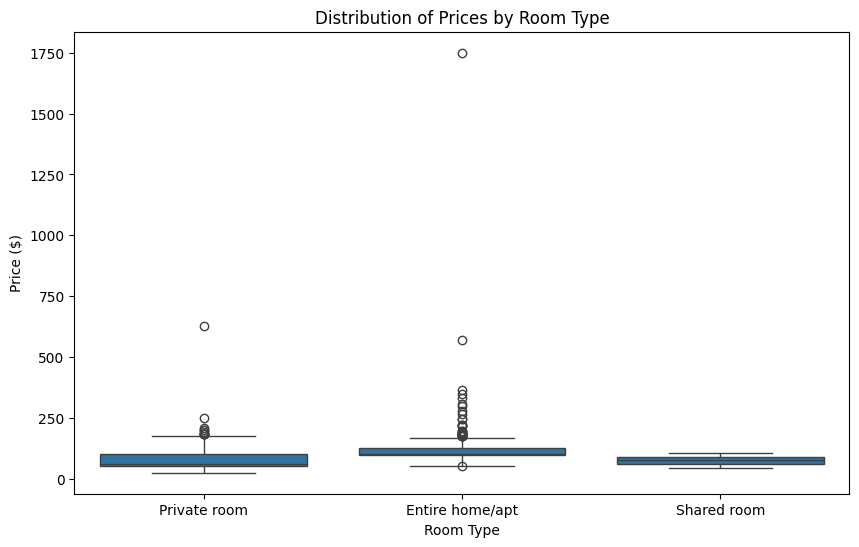

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=data)
plt.title('Distribution of Prices by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.show()

# **We note that the relationship between (price) and (room_type) is that the House/apartment is the highest priced among the private room  and shared room.**

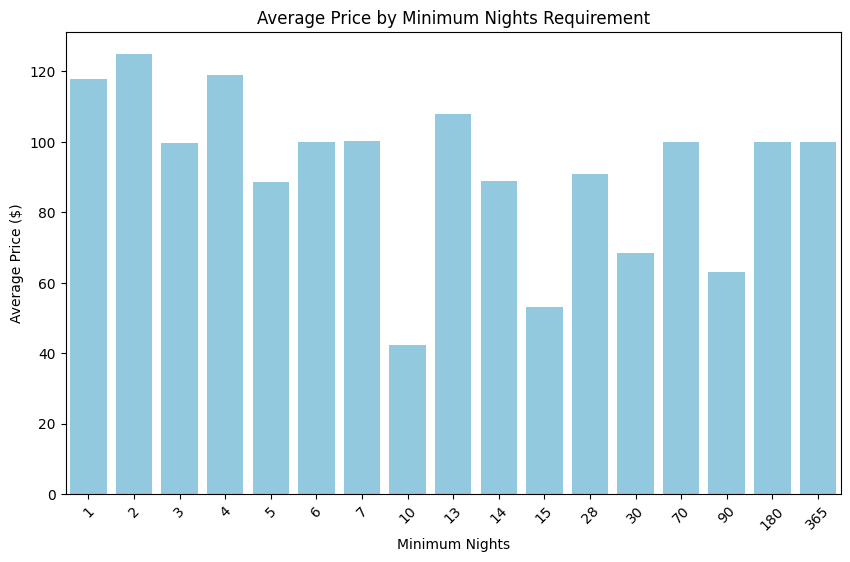

In [ ]:

mean_price_by_min_nights = data.groupby('minimum_nights')['price'].mean().reset_index()
mean_price_by_min_nights = mean_price_by_min_nights.sort_values(by='minimum_nights')
plt.figure(figsize=(10, 6))
sns.barplot(x='minimum_nights', y='price', data=mean_price_by_min_nights, color='skyblue')
plt.title('Average Price by Minimum Nights Requirement')
plt.xlabel('Minimum Nights')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()

## **The result shows that the average price is higher for listings with a higher minimum nights requirement, this mening ,Hosts may offer discounts for longer stays, making the average price higher for stays that require a minimum of nights. And the hosts do this to attract longer bookings & There might be seasonal or demand-related factors influencing the pricing strategy.**

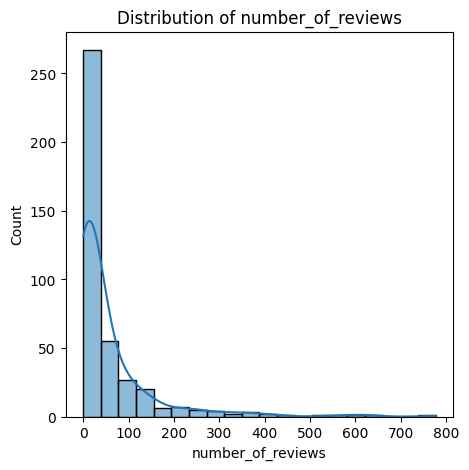

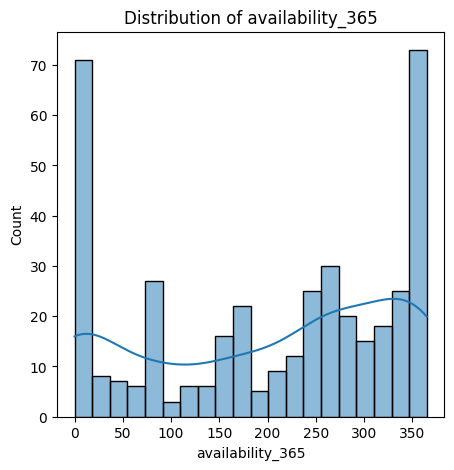

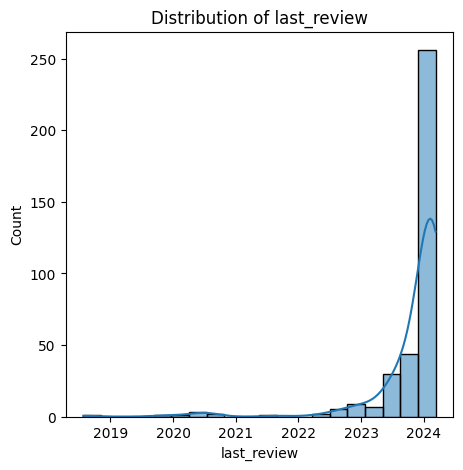

In [ ]:
continous_clm = ['number_of_reviews','availability_365','last_review' ]
for i in continous_clm:
        plt.figure(figsize=(5,5))
        sns.histplot(data[i], bins=20, kde=True)
        plt.title('Distribution of {}'.format(i))
        plt.show()

### **Statistical analysis :**


In [ ]:
corr = data.corr(numeric_only=True)
corr.style.background_gradient(cmap="copper_r")

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,last_review_numeric,room_type_numeric
id,1.000000,0.352673,0.084921,-0.013306,0.070126,-0.016610,-0.478508,0.222445,-0.049683,-0.036025,-0.240074,-0.227792,0.015969
host_id,0.352673,1.000000,-0.017787,0.016321,-0.001687,0.073544,-0.253627,0.105437,-0.037713,-0.037149,-0.113935,-0.108598,-0.005094
latitude,0.084921,-0.017787,1.000000,-0.568023,0.083872,-0.037618,-0.114256,0.018953,-0.001227,0.039412,-0.074186,-0.024374,-0.231625
longitude,-0.013306,0.016321,-0.568023,1.000000,-0.128712,0.069380,0.071004,0.013966,0.020206,0.025742,0.020511,-0.006818,0.295606
price,0.070126,-0.001687,0.083872,-0.128712,1.000000,-0.045292,-0.060067,0.088725,0.082794,-0.024713,-0.027704,-0.089202,0.163286
minimum_nights,-0.016610,0.073544,-0.037618,0.069380,-0.045292,1.000000,-0.073126,0.124258,-0.074194,0.088148,-0.116781,-0.129699,0.022843
number_of_reviews,-0.478508,-0.253627,-0.114256,0.071004,-0.060067,-0.073126,1.000000,-0.146409,-0.033647,-0.152686,0.671342,0.190422,0.108685
reviews_per_month,0.222445,0.105437,0.018953,0.013966,0.088725,0.124258,-0.146409,1.000000,-0.010075,0.009904,-0.201316,-0.997949,-0.025060
calculated_host_listings_count,-0.049683,-0.037713,-0.001227,0.020206,0.082794,-0.074194,-0.033647,-0.010075,1.000000,-0.074085,-0.004152,0.007064,0.032827
availability_365,-0.036025,-0.037149,0.039412,0.025742,-0.024713,0.088148,-0.152686,0.009904,-0.074085,1.000000,-0.215094,-0.024449,-0.067550
